# Motif analysis

In [1]:
# Imports

## General
import os 
from copy import deepcopy
from itertools import product
from types import SimpleNamespace
import sys
sys.path.append("..")
from RNN_helpers import *
from IPython.display import display, Markdown
import datetime as dt
import pprint as pp
import itertools as it

## Numerical
import numpy as np
import math
from scipy.stats import linregress
import statsmodels.formula.api as smf
import statsmodels.api as sm
import  statsmodels.stats.multicomp as smmc
from sklearn.neighbors import KernelDensity

## Plotting
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sb

## Data
import csv
import pandas as pd
import scipy.stats as sps

## Configuration
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

/Users/badr/git-research/InsanallyAlbanna2023/RNN_helpers/analyses/decoding.py:156: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if case is 'whole_trial':
/Users/badr/git-research/InsanallyAlbanna2023/RNN_helpers/analyses/decoding.py:164: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif case is 'stim_choice_period':
/Users/badr/git-research/InsanallyAlbanna2023/RNN_helpers/analyses/decoding.py:172: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif case is 'whole_trial_pre':
/Users/badr/git-research/InsanallyAlbanna2023/RNN_helpers/analyses/decoding.py:181: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif case is 'first_second':
/Users/badr/git-research/InsanallyAlbanna2023/RNN_helpers/analyses/decoding.py:190: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif case is 'last_second':
/Users/badr/git-research/InsanallyAlbanna2023/RNN_helpers/analyses/decoding.py:199: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif

ModuleNotFoundError: No module named 'baysian_neural_decoding'

In [2]:
# Plotting defaults and functions

%config InlineBackend.figure_format = 'retina'

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['axes.formatter.limits'] = [-2, 3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = 'Arial'
plt.rc('font', family='Arial')
plt.rcParams['figure.dpi'] = 150

# Setting Colors

R_COLOR = "#808080"
R_NO_STDP_COLOR = "#B3B3B3"
NNR_COLOR = '#FF767C'
NNR_NO_STDP_COLOR = "#FFBFC1"

PRE_STDP_COLOR = mpl.cm.Purples(2/5.)
STDP_COLOR = mpl.cm.Purples(1.)
STDP_CONTROL_COLOR = "#BA98FF"


## Motif model

In [23]:
filename = os.path.join(".", "data", "RNN", "motifs_2021-10-14-164616.csv")
df_out = pd.read_csv(os.path.join(DIR, filename), index_col="to")
df_out

,I_chR_1,inF_chR_1,inT_chR_1,out_chR_1,I_chR_2,inF_chR_2,inT_chR_2,out_chR_2,I_chR_3,inF_chR_3,...,_tr4_di_1101,_tr4_di_1110,NNR,eta,Wout,st_r,ch_r,r,IE_stdp,EE_stdp
to,,,,,,,,,,,,,,,,,,,,,
201,0.009560,0.004311,0.011589,0.004209,0.000189,-0.000542,0.012047,-0.001305,-0.006277,-0.007604,...,0.220363,0.293405,False,0.655463,-0.002781,2.625,1.525,3.035828,True,True
202,0.014639,0.007645,0.004410,0.005578,-0.000591,-0.006115,0.011433,0.002910,-0.013259,0.019429,...,-0.250339,0.305999,False,-0.690848,0.012660,2.575,-0.675,2.662001,True,True
203,0.014075,0.008778,0.007765,0.008019,-0.004790,0.012075,0.015394,0.004782,-0.003455,0.004262,...,-0.083795,-0.216526,False,0.286084,0.011350,1.350,0.750,1.544345,True,True
204,0.009664,0.008053,0.012058,0.008697,0.001675,0.007883,0.021333,0.010154,-0.017630,-0.007742,...,0.013297,-0.141815,True,-0.291614,-0.007896,0.600,-0.125,0.612883,True,True
205,0.015005,0.008556,0.010836,0.005396,-0.000074,-0.002264,-0.013983,-0.001457,-0.010969,-0.012755,...,0.086555,0.086059,True,-0.503654,0.002738,0.350,-0.550,0.651920,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.010250,0.012448,0.029889,0.007005,-0.014252,-0.000258,-0.008273,0.004701,-0.020952,-0.012446,...,-0.110099,0.366410,True,-0.452005,0.004110,0.875,-0.375,0.951972,False,False
797,0.011709,0.013011,0.009096,0.010775,0.007942,0.012009,-0.025308,0.010798,-0.022426,0.040221,...,-0.418759,-0.317283,False,-0.439401,0.012355,1.375,-0.050,1.375909,False,False
798,0.012958,0.010964,0.002440,0.006296,-0.014508,-0.001309,-0.014595,-0.008724,-0.008714,0.010400,...,-0.294767,-0.051155,False,0.155398,0.000378,1.150,1.325,1.754459,False,False


### Stimulus

                                 OLS Regression Results                                
Dep. Variable:                   st_r   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              5338.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:16:56   Log-Likelihood:                         -11505.
No. Observations:               14400   AIC:                                  2.304e+04
Df Residuals:                   14386   BIC:                                  2.314e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

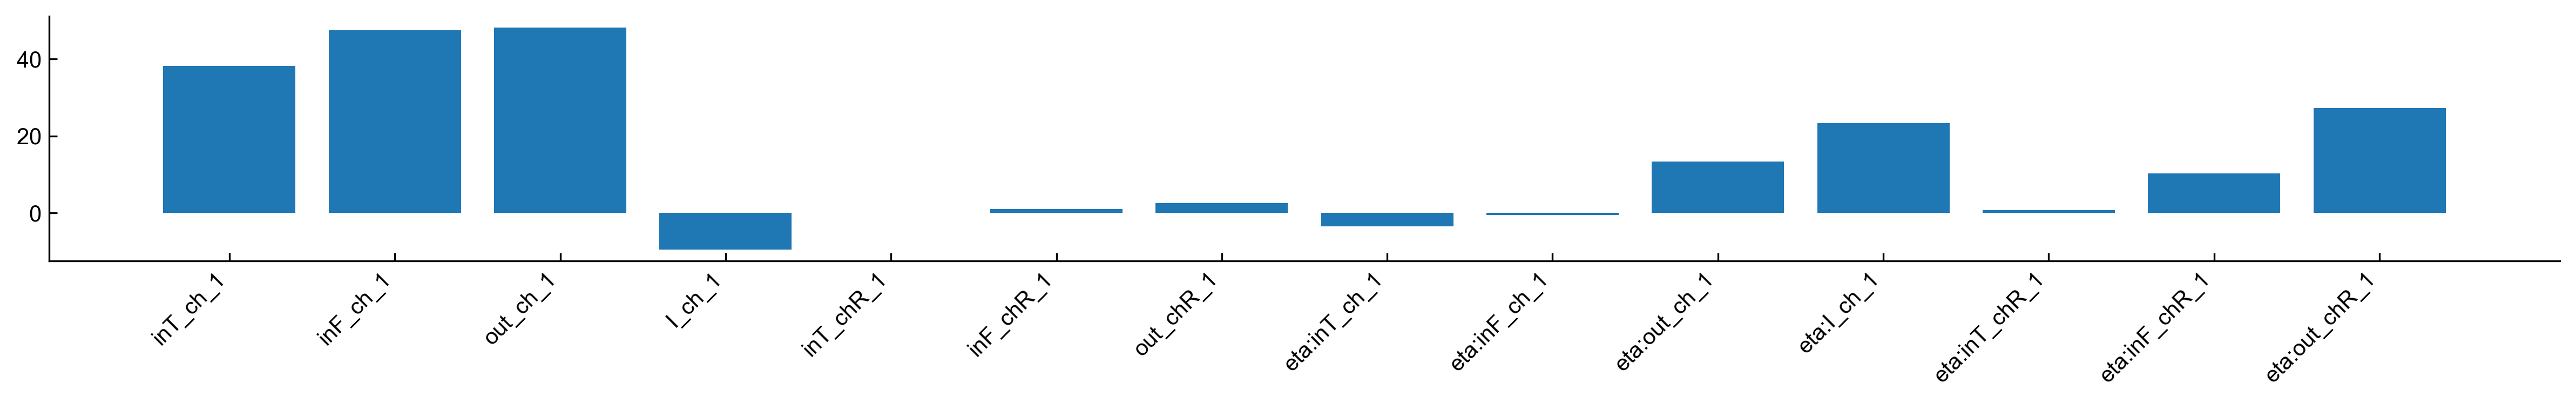

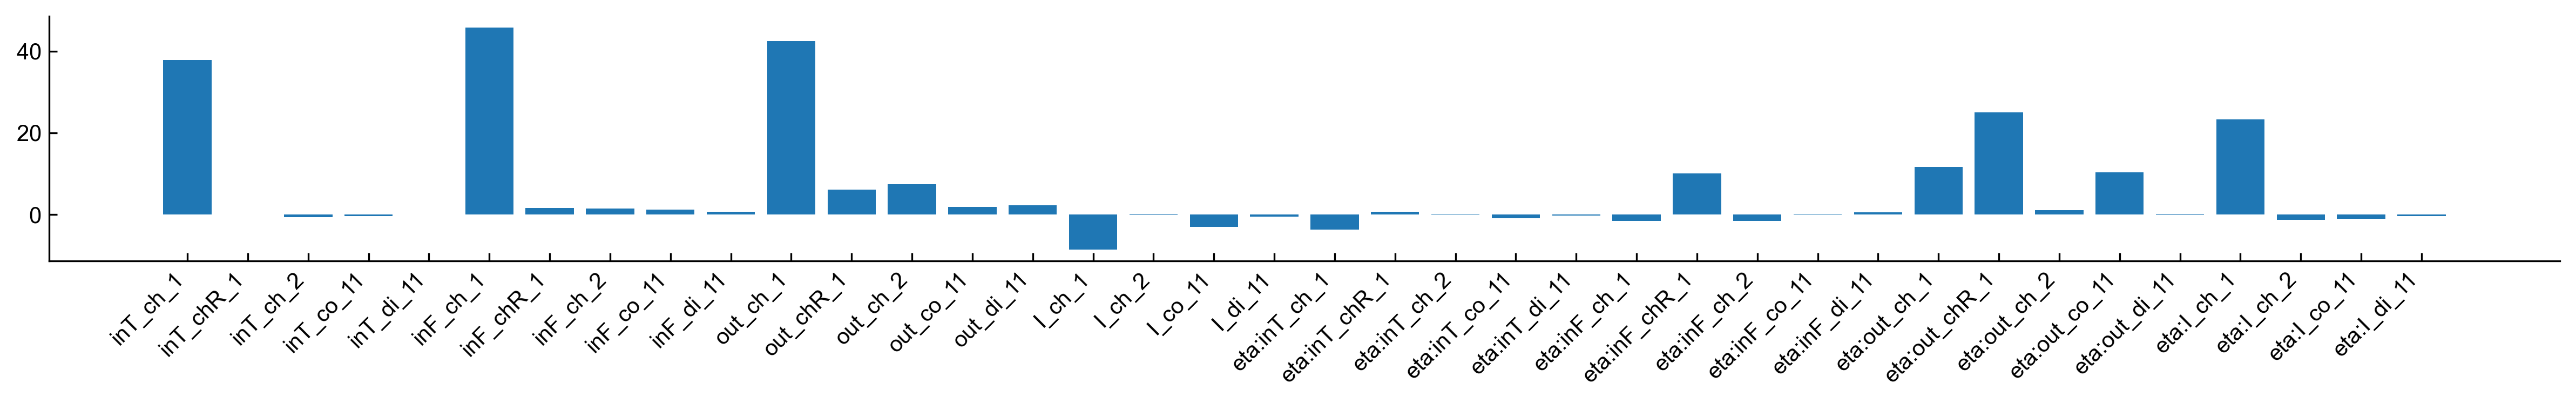

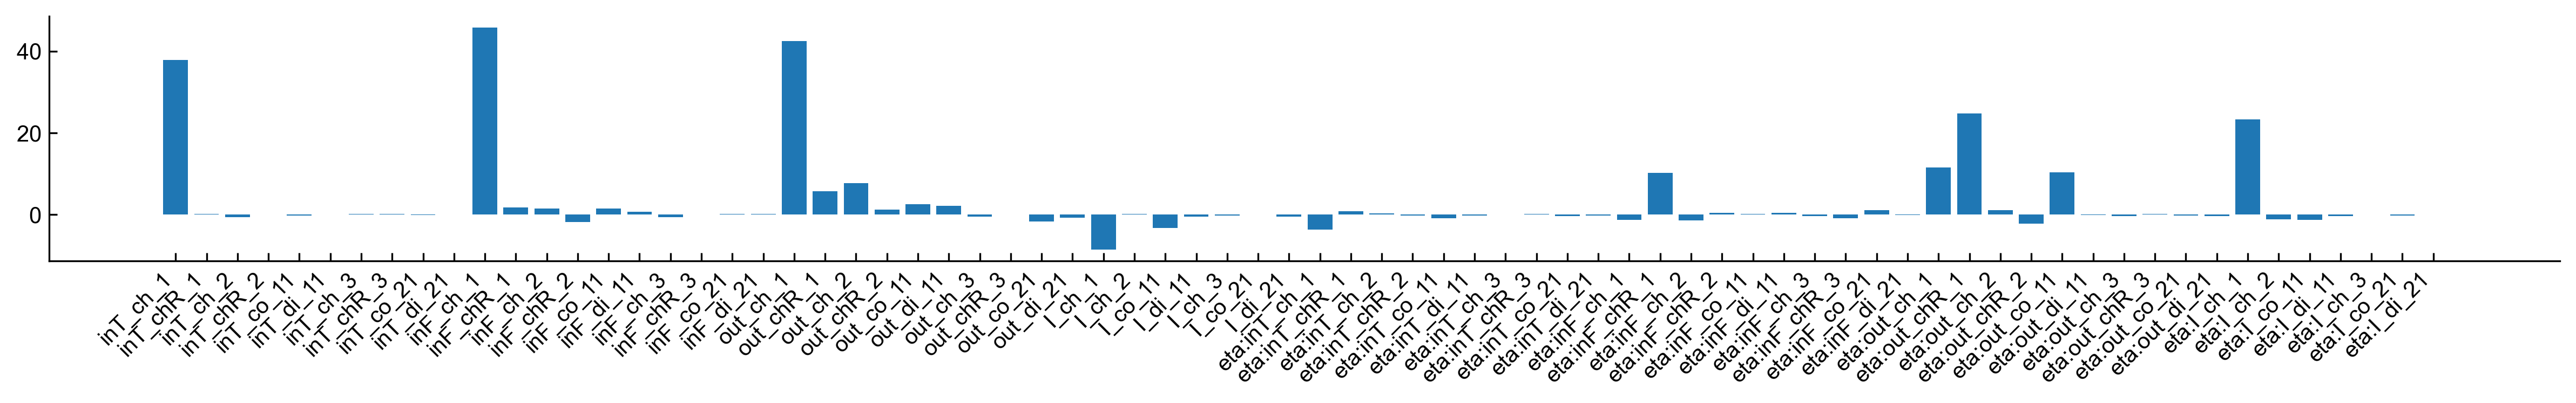

In [26]:
st_first_order_model_chR_no_tr = "st_r ~ eta*(inT_ch_1 + inF_ch_1 + out_ch_1 + I_ch_1 + inT_chR_1 + inF_chR_1 + out_chR_1) - 1 - eta"
st_second_order_model_chR_no_tr = "st_r ~ eta*(inT_ch_1 + inT_chR_1 + (inT_ch_2 + inT_co_11 + inT_di_11) + inF_ch_1 + inF_chR_1 + (inF_ch_2 + inF_co_11 + inF_di_11) + out_ch_1 + out_chR_1 + (out_ch_2 + out_co_11 + out_di_11) + I_ch_1 + (I_ch_2 + I_co_11 + I_di_11)) - 1 - eta"
st_third_order_model_chR_no_tr = "st_r ~ eta*(inT_ch_1 + inT_chR_1  + (inT_ch_2 + inT_chR_2 + inT_co_11 + inT_di_11) + (inT_ch_3 + inT_chR_3 + inT_co_21 + inT_di_21) + inF_ch_1 + inF_chR_1 + (inF_ch_2 + inF_chR_2 + inF_co_11 + inF_di_11) + (inF_ch_3 + inF_chR_3 + inF_co_21 + inF_di_21) + out_ch_1 + out_chR_1 + (out_ch_2 + out_chR_2 + out_co_11 + out_di_11) + (out_ch_3 + out_chR_3 + out_co_21 + out_di_21) + I_ch_1  + (I_ch_2 + I_co_11 + I_di_11) + (I_ch_3 + I_co_21 + I_di_21)) - 1 - eta"

name = "tr"
models = [st_first_order_model_chR_no_tr, st_second_order_model_chR_no_tr, st_third_order_model_chR_no_tr]
st_c_eta = []

for i, model in enumerate(models):
    order = i + 1

    st_c_eta.append(smf.ols(model, data=df_out).fit())
    print(st_c_eta[-1].summary()) 

    params = dict(st_c_eta[-1].params)
    names = params.keys()
    values = params.values()

    fig, ax = plt.subplots(figsize=(20,2))
    ax.bar(range(len(params)), values)

    ax.set_xticks(range(len(params)))
    ax.set_xticklabels(names, rotation=45, ha='right')

for i, mdl in enumerate(st_c_eta):
    mdl.save(os.path.join(DIR, f"stimulus_{name}_order_{i}.mdl"))

### Choice 

                                 OLS Regression Results                                
Dep. Variable:                   ch_r   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              3154.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:16:59   Log-Likelihood:                         -17476.
No. Observations:               14400   AIC:                                  3.498e+04
Df Residuals:                   14386   BIC:                                  3.509e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

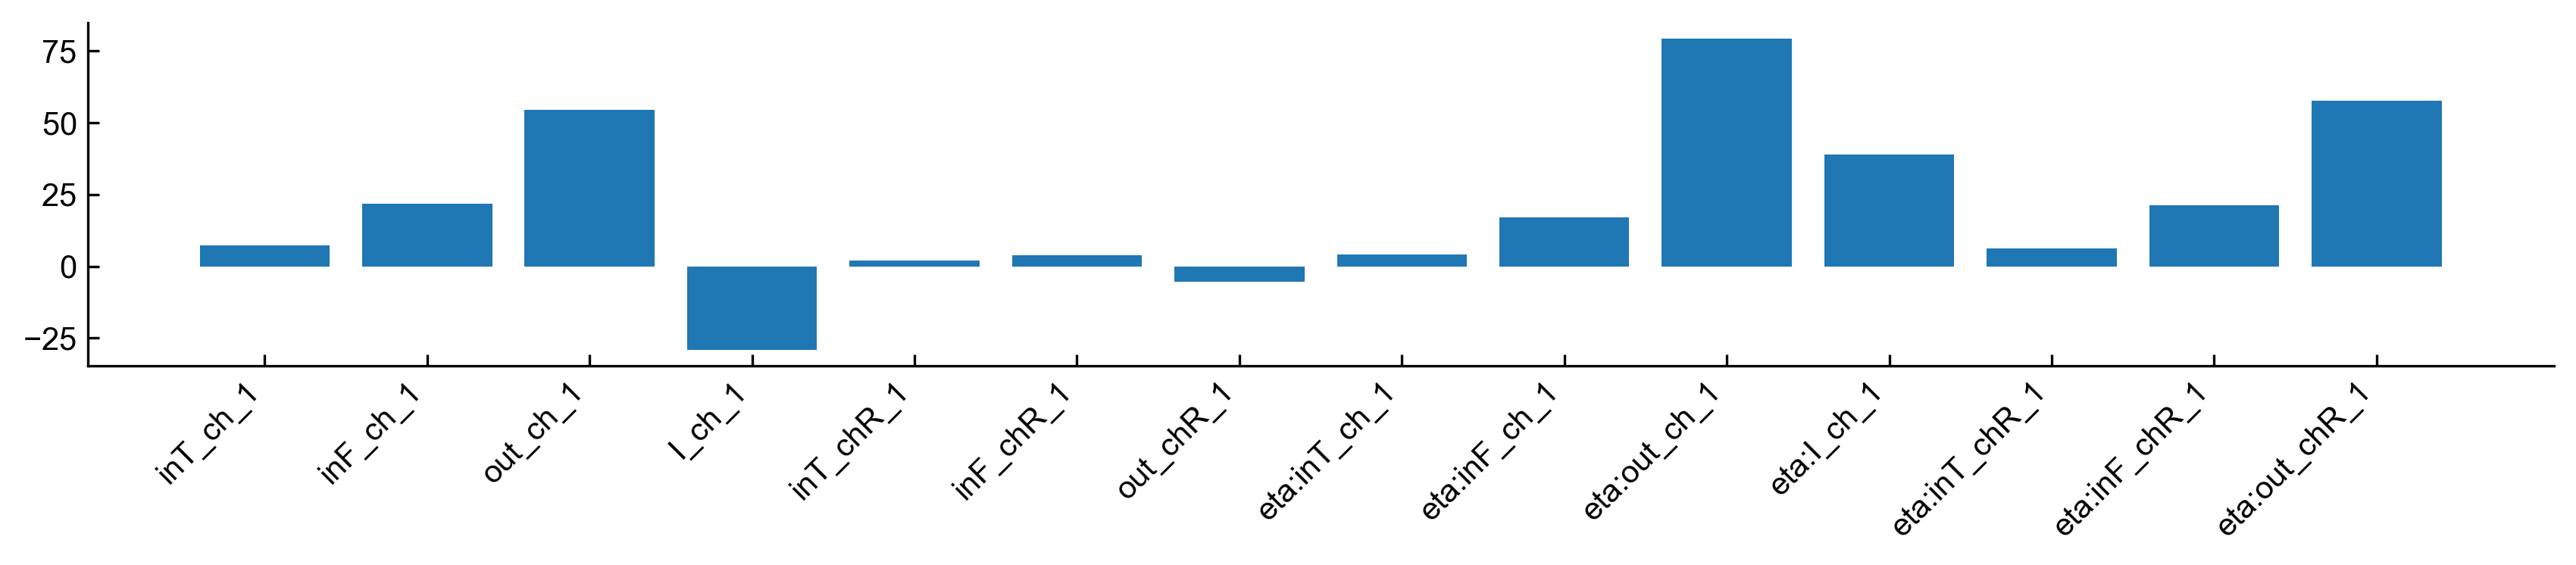

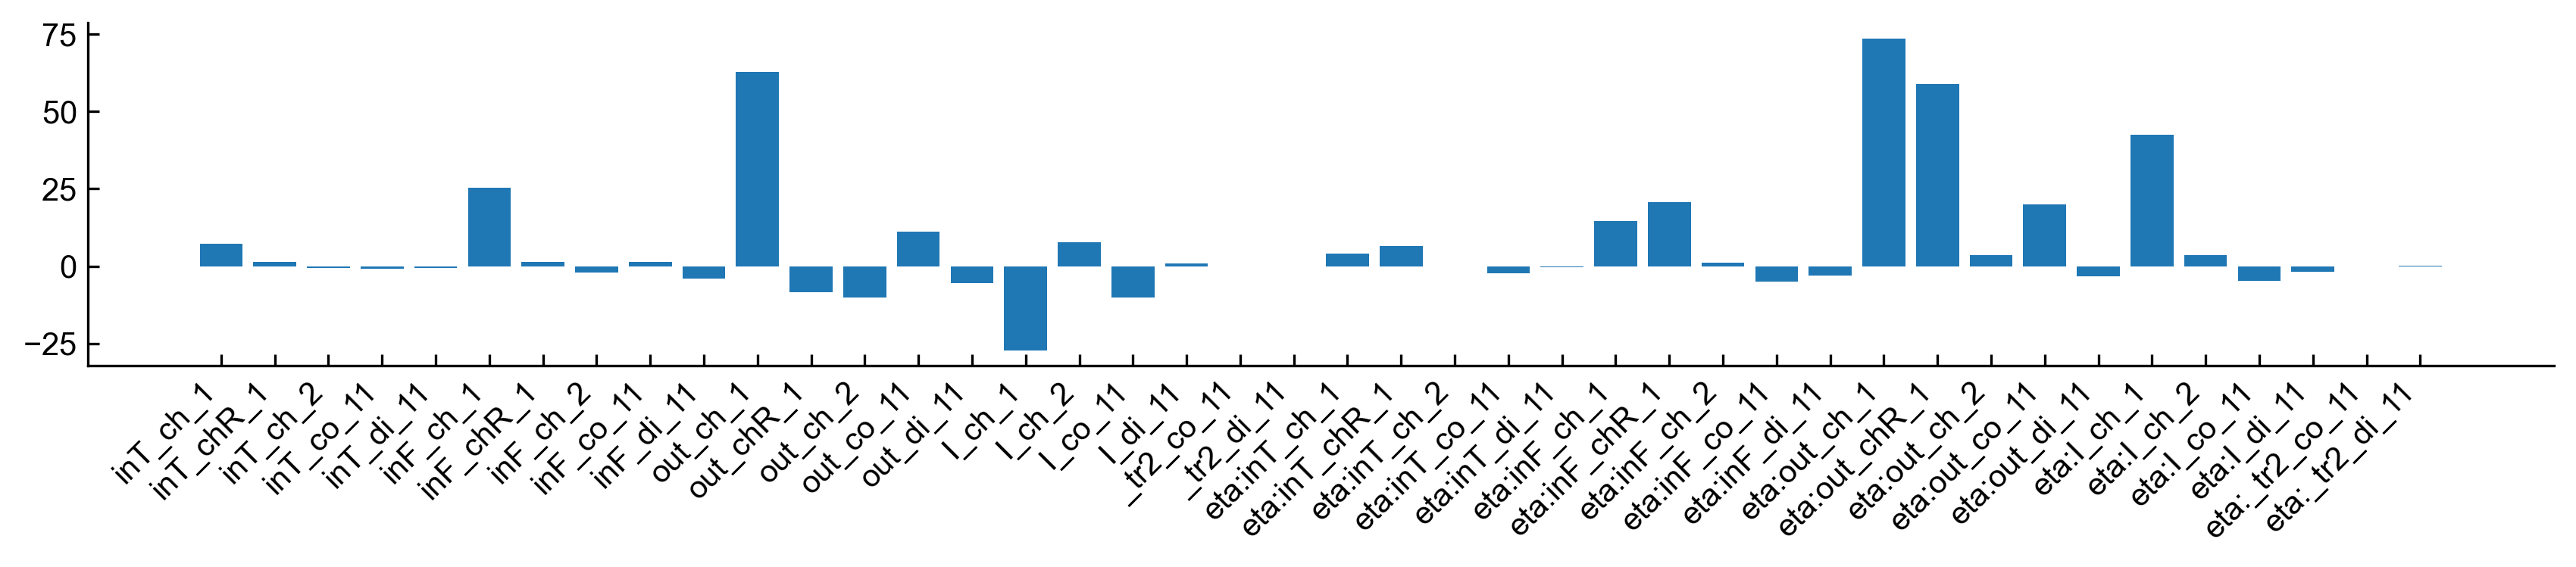

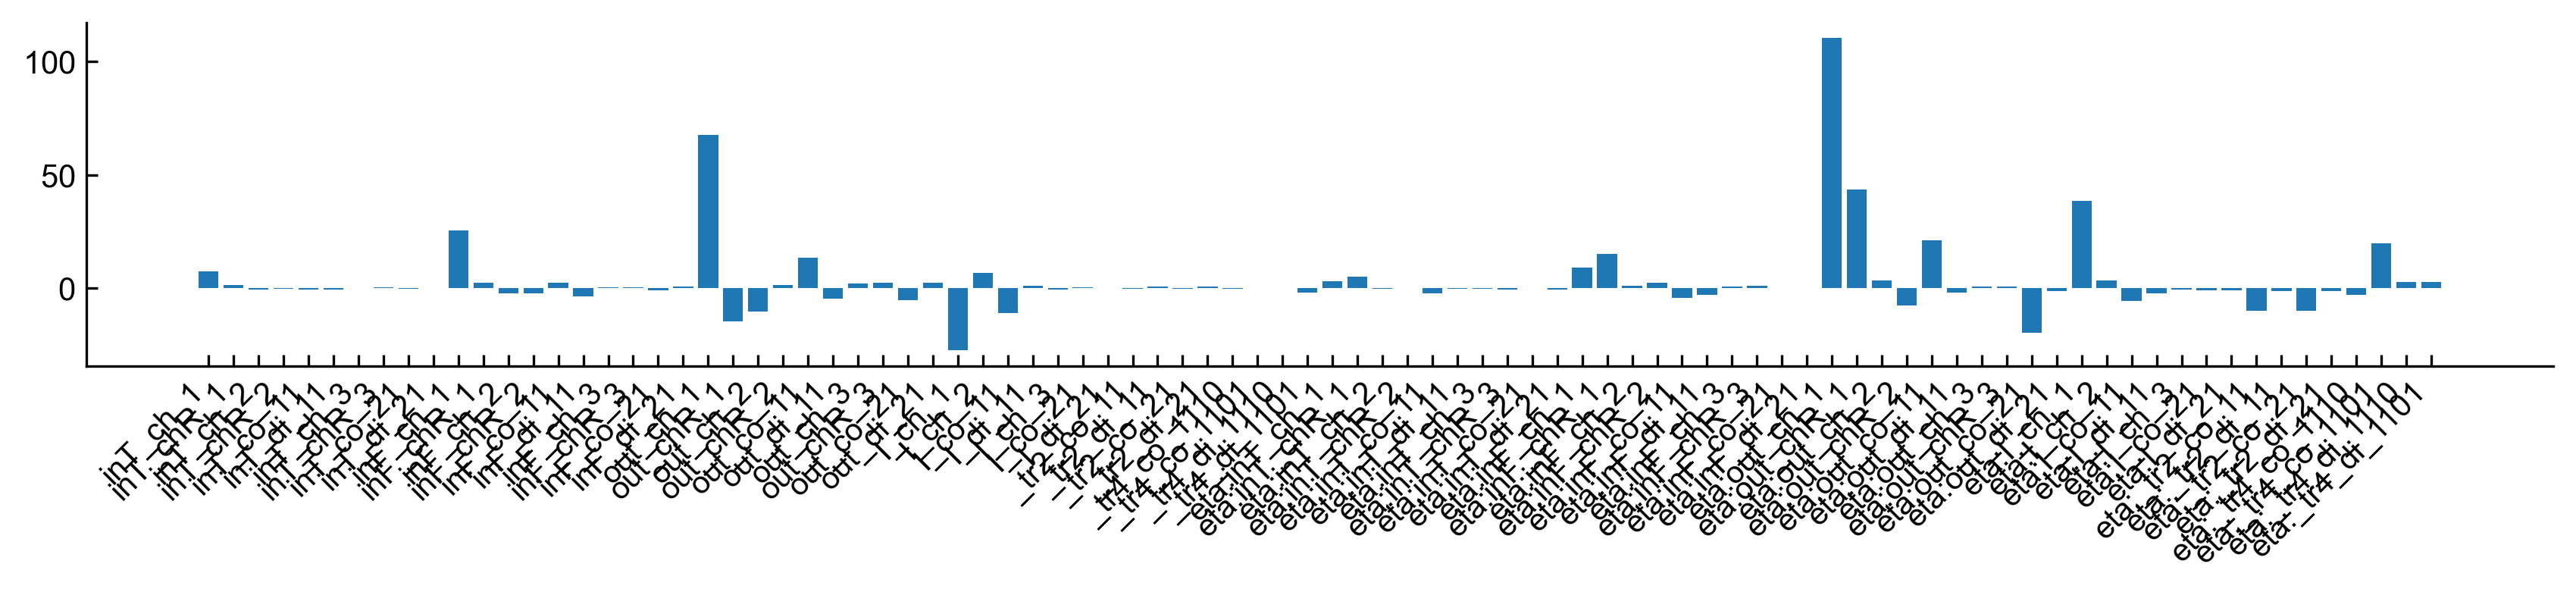

In [27]:


ch_first_order_model_chR_no_tr = "ch_r ~ eta*(inT_ch_1 + inF_ch_1 + out_ch_1 + I_ch_1 + inT_chR_1 + inF_chR_1 + out_chR_1) - 1 - eta"
ch_second_order_model_chR_no_tr = "ch_r ~ eta*(inT_ch_1 + inT_chR_1 + (inT_ch_2 + inT_co_11 + inT_di_11) + inF_ch_1 + inF_chR_1 + (inF_ch_2 + inF_co_11 + inF_di_11) + out_ch_1 + out_chR_1 + (out_ch_2 + out_co_11 + out_di_11) + I_ch_1 + (I_ch_2 + I_co_11 + I_di_11)) - 1 - eta"
ch_third_order_model_chR_no_tr = "ch_r ~ eta*(inT_ch_1 + inT_chR_1  + (inT_ch_2 + inT_chR_2 + inT_co_11 + inT_di_11) + (inT_ch_3 + inT_chR_3 + inT_co_21 + inT_di_21) + inF_ch_1 + inF_chR_1 + (inF_ch_2 + inF_chR_2 + inF_co_11 + inF_di_11) + (inF_ch_3 + inF_chR_3 + inF_co_21 + inF_di_21) + out_ch_1 + out_chR_1 + (out_ch_2 + out_chR_2 + out_co_11 + out_di_11) + (out_ch_3 + out_chR_3 + out_co_21 + out_di_21) + I_ch_1  + (I_ch_2 + I_co_11 + I_di_11) + (I_ch_3 + I_co_21 + I_di_21)) - 1 - eta"

name = "tr"
models = [ch_first_order_model_chR, ch_second_order_model_chR, ch_third_order_model_chR]
ch_c_eta = []

for i, model in enumerate(models):
    order = i + 1

    ch_c_eta.append(smf.ols(model, data=df_out).fit())
    print(ch_c_eta[-1].summary()) 

    params = dict(ch_c_eta[-1].params)
    names = params.keys()
    values = params.values()

    fig, ax = plt.subplots(figsize=(14,2))
    ax.bar(range(len(params)), values)

    ax.set_xticks(range(len(params)))
    ax.set_xticklabels(names, rotation=45, ha='right')


for i, mdl in enumerate(ch_c_eta):
    mdl.save(os.path.join(DIR, f"choice_{name}_order_{i}.mdl"))

### Picking a model and isloating significant factors

In [28]:
# Picking a model
MODEL_NAME = "2o_chR_no_tr"
st_model = st_second_order_model_chR_no_tr
ch_model = ch_second_order_model_chR_no_tr

st_c_eta = smf.ols(st_model, data=df_out).fit()
ch_c_eta = smf.ols(ch_model, data=df_out).fit()

# Selecting only significant coefficients
P = 0.00001

for model in [st_c_eta, ch_c_eta]:
    sig_names = []
    n_model = len(model.params)
    p_thresh = P / n_model
    for param in dict(model.params).items():
        name, weight = param
        if model.pvalues[name] <= p_thresh:    
            if (':' in name):
                name = name.split(':')[1]
            if name not in sig_names:
                sig_names.append(name)

new_motifs = "(" + " + ".join(sig_names) + ")"
new_model_string = new_motifs + " + eta * " + new_motifs + " - eta - 1"

# Generating fit with only significant factors
st_model = "st_r ~" + new_model_string
ch_model = "ch_r ~" + new_model_string

st_c_eta = smf.ols(st_model, data=df_out).fit()
ch_c_eta = smf.ols(ch_model, data=df_out).fit()

print(f"Significant motifs are {sig_names}")


Significant motifs are ['inT_ch_1', 'inF_ch_1', 'inF_di_11', 'out_ch_1', 'out_ch_2', 'out_co_11', 'out_di_11', 'I_ch_1', 'I_ch_2', 'I_co_11', 'inF_chR_1', 'out_chR_1']


## Cross validation of predictions for individual units

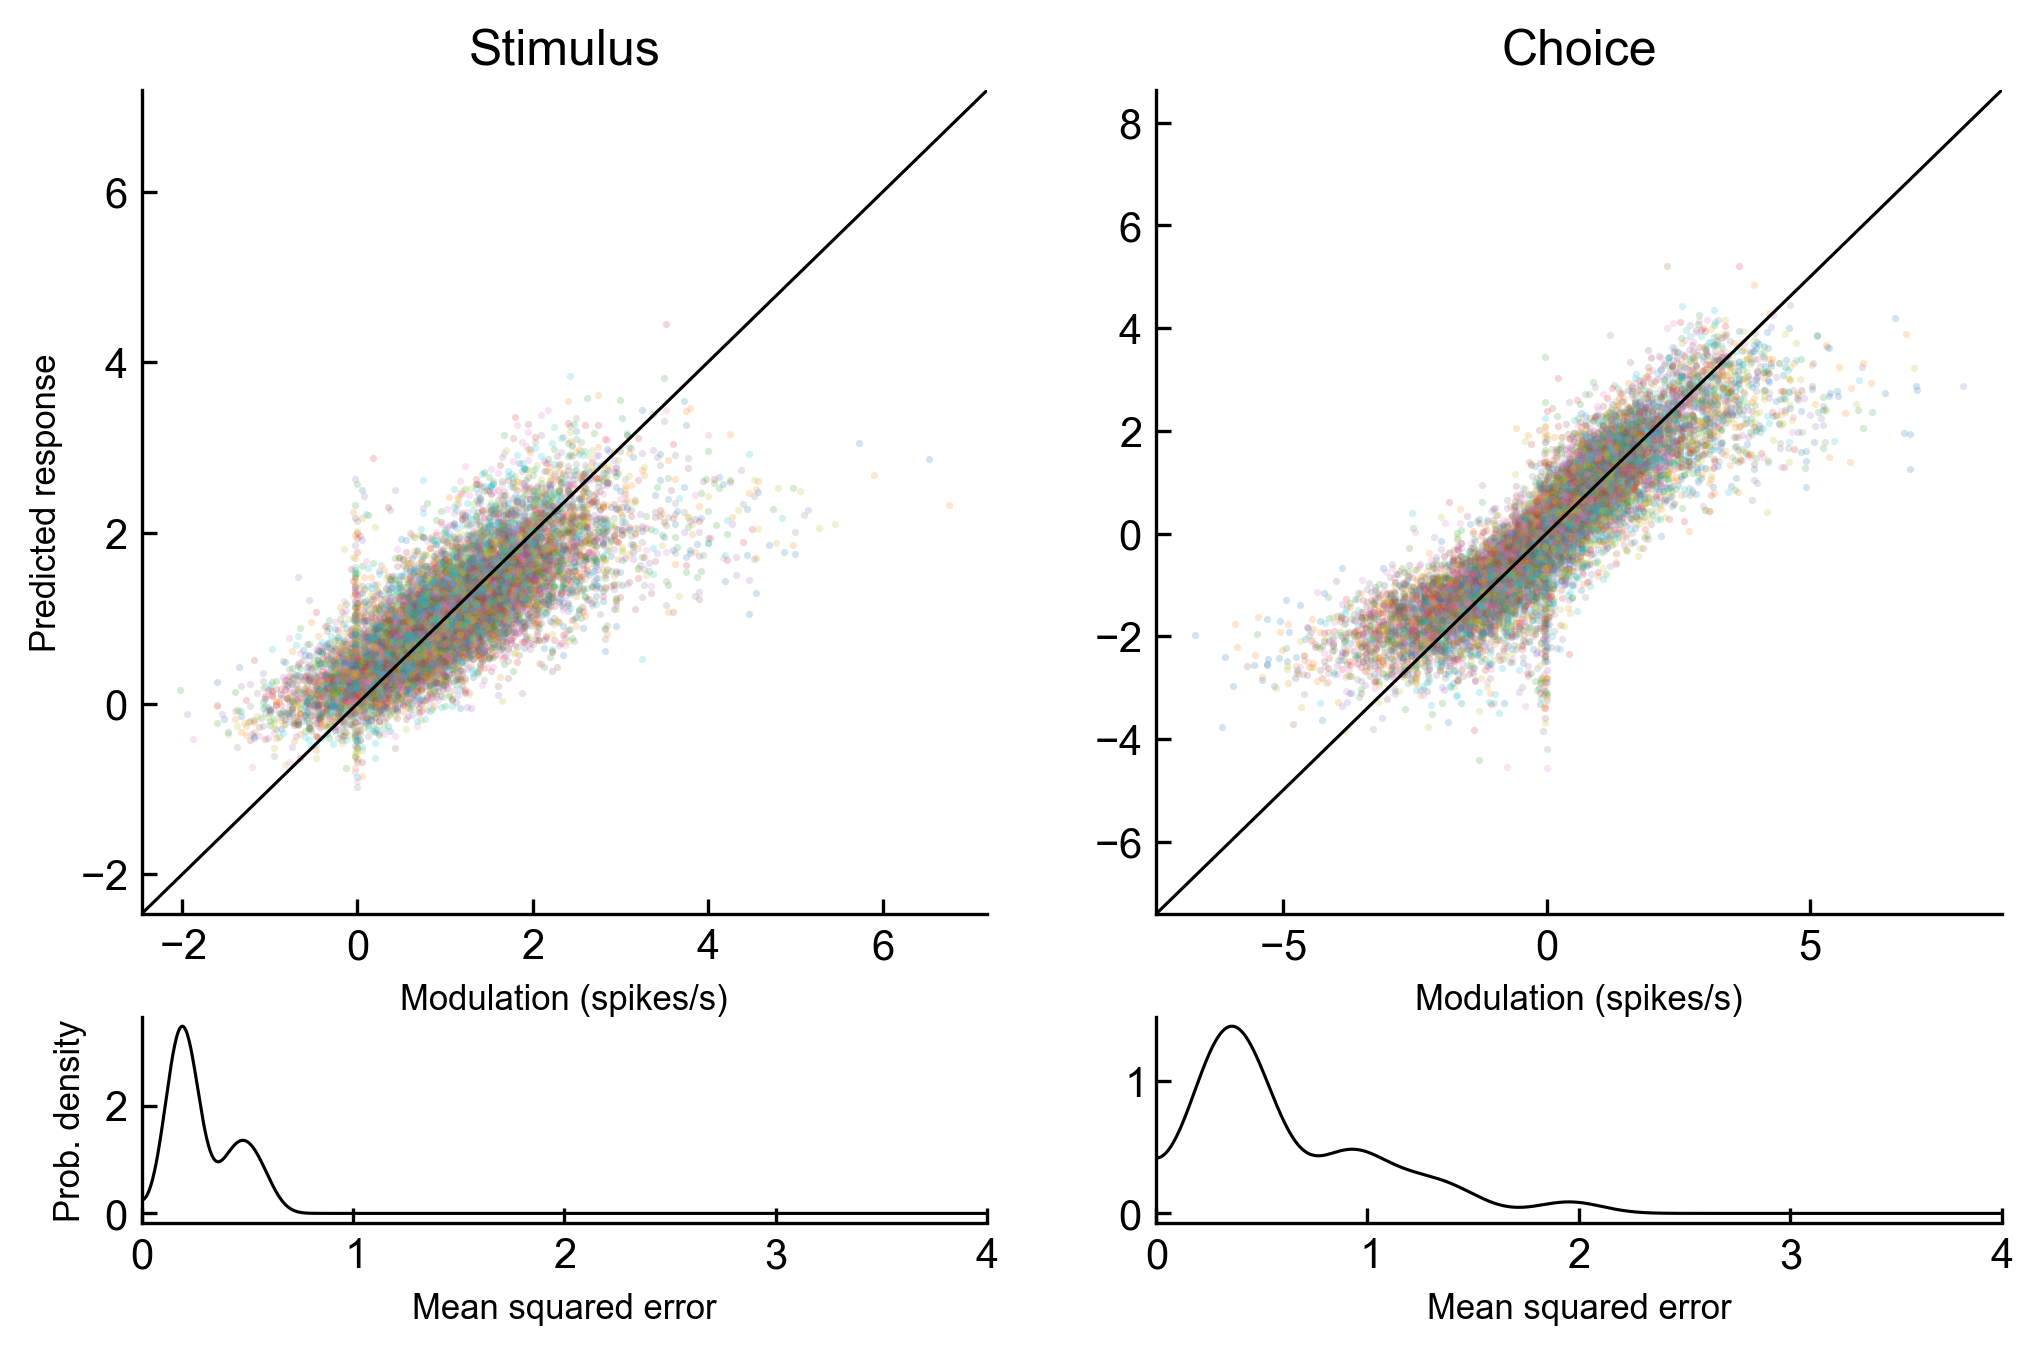

In [64]:
NAME = "stimulus_choice_individual_prediction"

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error

fig = plt.figure(figsize=(8, 5))
gs = plt.GridSpec(ncols=2, nrows=2, figure=fig, height_ratios=[4, 1])

ax_s = fig.add_subplot(gs[0,0])
ax_s_mse = fig.add_subplot(gs[1,0])
ax_c = fig.add_subplot(gs[0,1])
ax_c_mse = fig.add_subplot(gs[1,1])

st_MSE_all = []
ch_MSE_all = []
st_R2_all = []
ch_R2_all = []

df_out["cv_s_pred"] = 0.0
df_out["cv_c_pred"] = 0.0
df_out["cv_r_pred"] = 0.0

for train, test in KFold(n_splits=30).split(df_out):
    test_df = df_out.iloc[test]
    st_c_eta_t = smf.ols(st_model, data=df_out.iloc[train]).fit()
    ch_c_eta_t = smf.ols(ch_model, data=df_out.iloc[train]).fit()
    
    st_pred = st_c_eta_t.predict(test_df)
    ch_pred = ch_c_eta_t.predict(test_df)
    r_pred = np.sqrt(st_pred**2 + ch_pred**2) 

    df_out["cv_s_pred"].iloc[test] = st_pred
    df_out["cv_c_pred"].iloc[test] = ch_pred
    df_out["cv_r_pred"].iloc[test] = r_pred

    #st_r2 = (st_pred**2).sum() / (test_df["st_r"]**2).sum()
    
    st_MSE = mean_squared_error(test_df["st_r"], st_pred)
    st_MSE_all.append(st_MSE)
    ch_MSE = mean_squared_error(test_df["ch_r"], ch_pred)
    ch_MSE_all.append(ch_MSE)
    
    st_R2 = np.sqrt(r2_score(test_df["st_r"], st_pred))
    st_R2_all.append(st_R2)
    ch_R2 = np.sqrt(r2_score(test_df["ch_r"], ch_pred))
    ch_R2_all.append(ch_R2)
    
    # display(Markdown(f"$r^2 = {r2:.3}$, $MSE = {MSE:.3}$"))
    
    ax_s.scatter(df_out.iloc[test]["st_r"], st_pred, s=3, alpha=.2, lw=0)
    ax_c.scatter(df_out.iloc[test]["ch_r"], ch_pred, s=3, alpha=.2, lw=0)

plot_pdf(st_MSE_all, ax_s_mse, bandwidth=.2, lim=(0, 4), end_domain=0, color='k', lw=.75)
ax_s_mse.set_xlabel("Mean squared error")
ax_s_mse.set_ylabel("Prob. density")

plot_pdf(ch_MSE_all, ax_c_mse, bandwidth=.2, lim=(0, 4), end_domain=0, color='k', lw=.75)
ax_c_mse.set_xlabel("Mean squared error")

for ax in (ax_s, ax_c):
    #ax.set_aspect('equal')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    mn = np.min([x_min, y_min])
    mx = np.max([x_max, y_max])
    ax.plot([mn, mx], [mn, mx], lw=.75, c='k')
    ax.set_xlim([mn, mx])
    ax.set_ylim([mn, mx])
    ax.set_xlabel("Modulation (spikes/s)")
ax_s.set_ylabel("Predicted response")
ax_s.set_title("Stimulus")
ax_c.set_title("Choice")

fig.savefig(os.path.join(DIR, f"{NAME}-{MODEL_NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}-{MODEL_NAME}.png"), dpi=300)

In [65]:
print(f"MSE_st = {np.mean(st_MSE_all):.2f} +/- {np.std(st_MSE_all):.2f}")
print(f"R2_st = {np.mean(st_R2_all):.2f} +/- {np.std(st_R2_all):.2f}")
print(f"MSE_ch = {np.mean(ch_MSE_all):.2f} +/- {np.std(ch_MSE_all):.2f}")
print(f"R2_ch = {np.mean(ch_R2_all):.2f} +/- {np.std(ch_R2_all):.2f}")


MSE_st = 0.29 +/- 0.15
R2_st = 0.75 +/- 0.06
MSE_ch = 0.63 +/- 0.43
R2_ch = 0.87 +/- 0.02


## Plotting motif contributions 

In [32]:
df_s = calc_motif_contributions(df_out, st_c_eta, "s_")
df_c = calc_motif_contributions(df_out, ch_c_eta, "c_")
df_new = pd.merge(df_s, df_c)

# Calculating total response contributions
for i in range(1, 3):
    df_new["r_con_net_" + str(i)] = 0.0
df_new["r_con_net"] = 0.0

for name in sig_names:
    df_new["r_con_" + name] = 0.0
    s_contrib = df_new["s_con_net"] * df_new["s_con_" + name]
    c_contrib = df_new["c_con_net"] * df_new["c_con_" + name]
    df_new["r_con_" + name] += s_contrib + c_contrib
    df_new["r_con_net_" + str(find_order(name))] += s_contrib + c_contrib
    df_new["r_con_net"] += s_contrib + c_contrib

now = dt.datetime.now().strftime('%Y-%m-%d-%H%M%S')
df_new.to_csv(os.path.join(DIR, f"motifs_predictions_{now}.csv"))
    

In [10]:
then = "2021-10-14-140122"
df_new = pd.read_csv(os.path.join(DIR, f"motifs_predictions_{then}.csv"), index_col=0)

### NCR vs CR

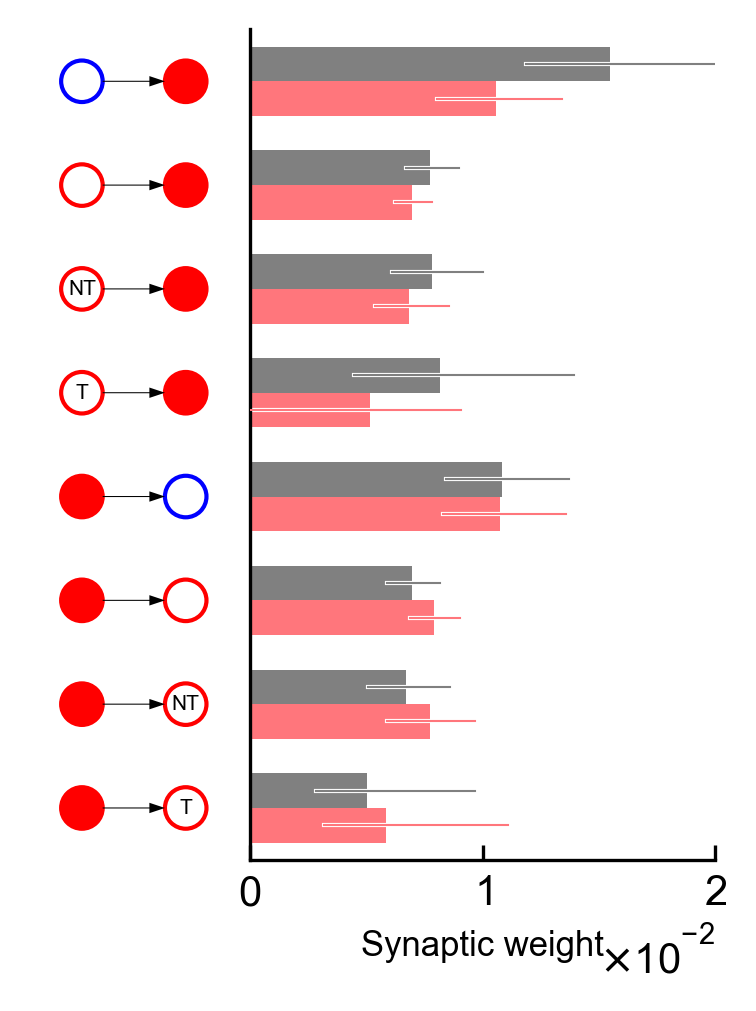

In [33]:
NAME= "NCR_first_order_motifs"
XLABEL = "Synaptic weight"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="", current_order=1, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[0, 0.02], fill=True, sortby="direction", width_ratio=2)
ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True)
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

In [34]:
a = 0.05
n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inT_chR_1:	4.0010962754162706e-05
inF_chR_1:	2.043307790681697e-31
out_chR_1:	2.060133068515505e-80
I_chR_1:	1.4108421459120253
inT_ch_1:	3.835471129832495e-64
inF_ch_1:	3.2333625416676935e-39
out_ch_1:	1.998076672395059e-71
I_ch_1:	4.0642383354818905e-204


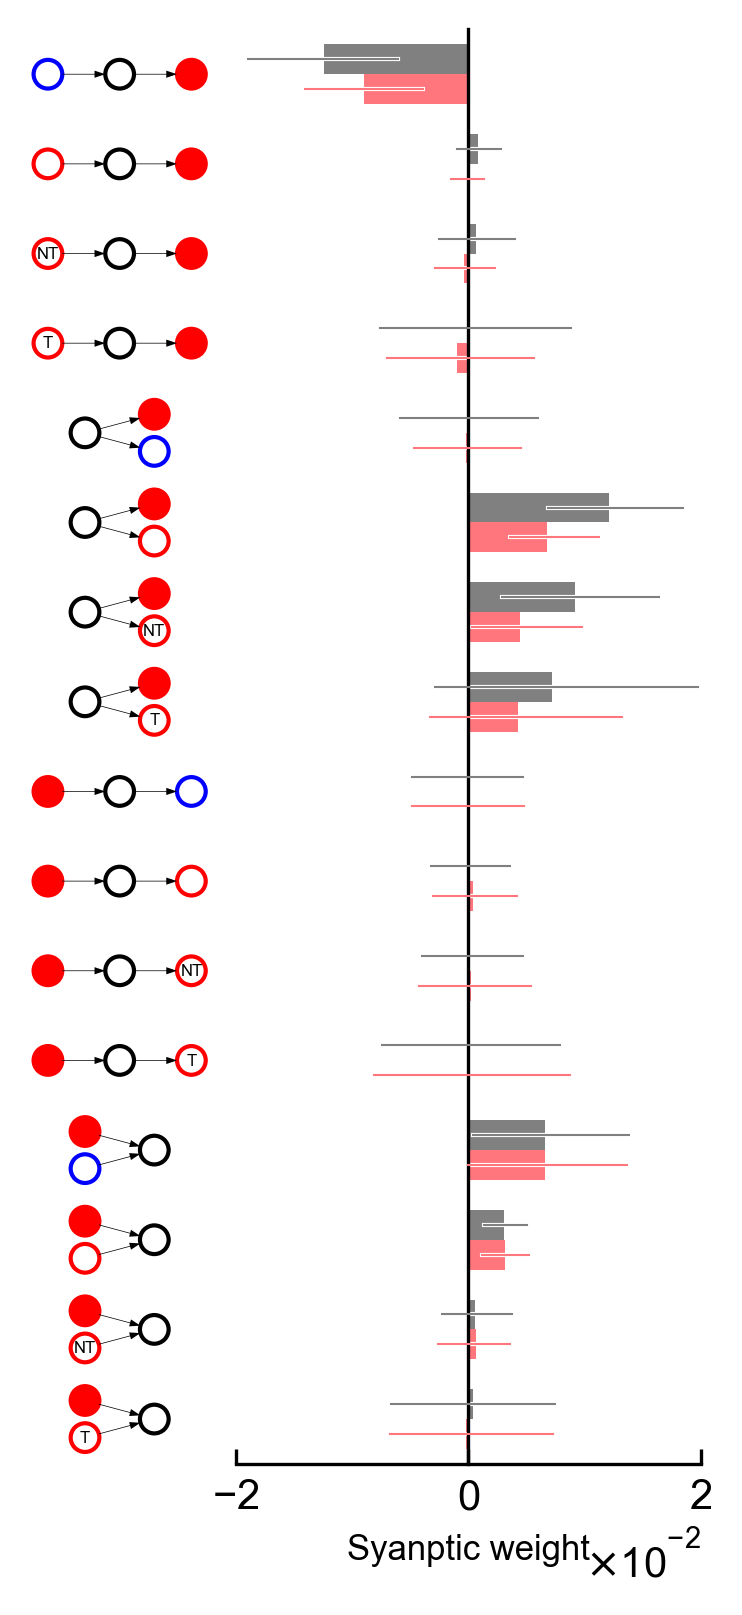

In [35]:
NAME= "NCR_second_order_motifs"
XLABEL = "Syanptic weight"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="", current_order=2, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], colors=[NNR_COLOR, R_COLOR], xlim=[-0.02, 0.02], sc=8, fs=4, sortby="direction", width_ratio=2)

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True)
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

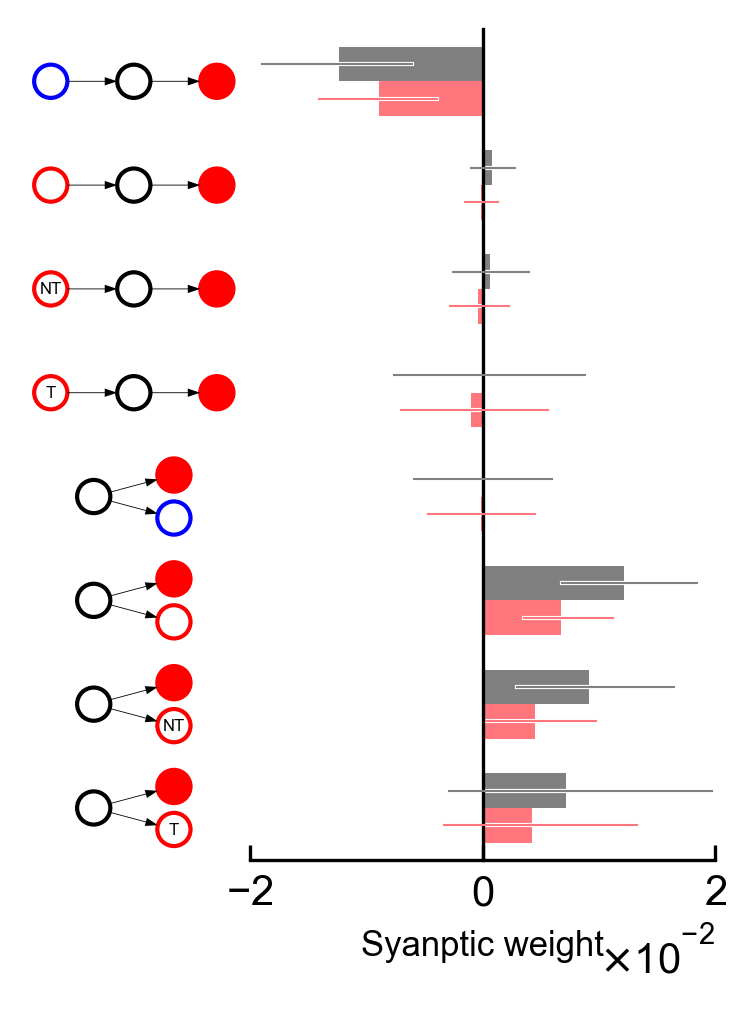

In [36]:
NAME= "NCR_second_order_motifs_1"
XLABEL = "Syanptic weight"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="", current_order=2, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[-0.02, 0.02], sc=8, fs=4, sortby="direction", show_only=["ch", "di"], width_ratio=2)

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True)
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

In [37]:
a = 0.05
n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inT_di_11:	1.9040602925062223e-10
inF_di_11:	1.0109805171851036e-62
out_di_11:	8.81028217309582e-115
I_di_11:	2.3457806806759285
inT_ch_2:	0.00607213518895107
inF_ch_2:	8.037415030939216e-14
out_ch_2:	1.9942175823256695e-35
I_ch_2:	3.015448565097728e-38


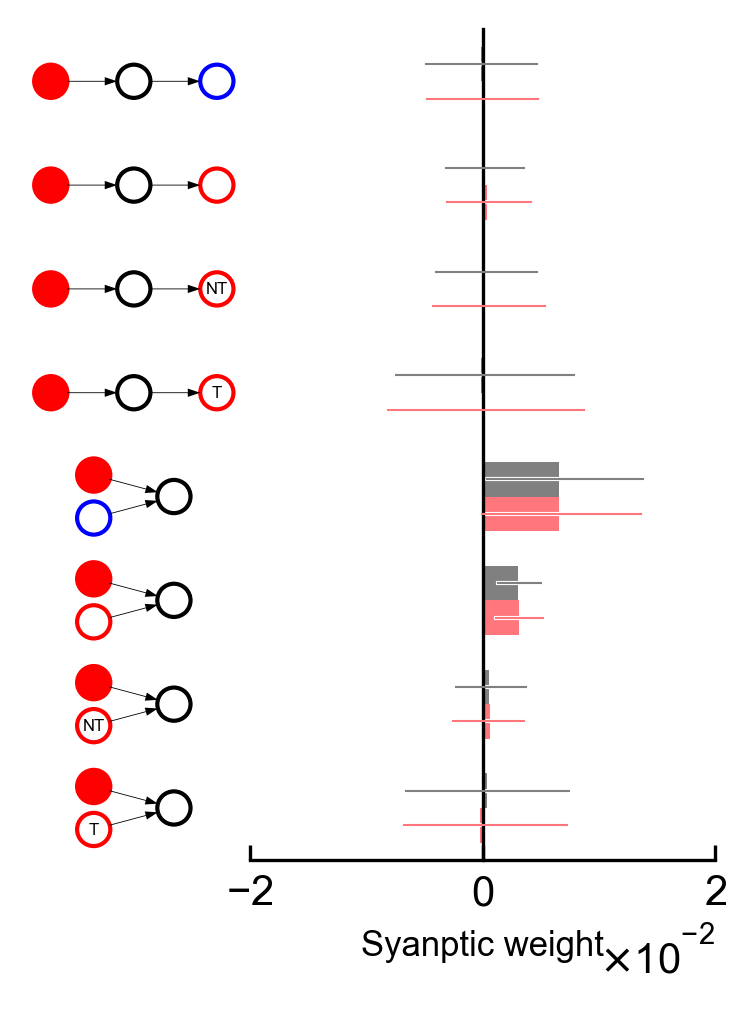

In [38]:
NAME= "NCR_second_order_motifs_2"
XLABEL = "Syanptic weight"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="", current_order=2, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[-0.02, 0.02], sc=8, fs=4, sortby="direction", show_only=["chR", "co"], width_ratio=2)

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True)
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

In [39]:
a = 0.05
n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inT_co_11:	1.5861854732371228
inF_co_11:	0.9362071215777608
out_co_11:	2.3255480380239772
I_co_11:	3.4084100844108787
inT_chR_2:	2.9964058024395612
inF_chR_2:	1.9809717733897423
out_chR_2:	0.5055794228247015
I_chR_2:	1.719696142081017


In [40]:
a = 0.05
n = len(data.keys())
test = sps.levene

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inT_co_11:	7.890705141941628
inF_co_11:	0.3060758230049964
out_co_11:	0.0033926100874177283
I_co_11:	0.06238477889045199
inT_chR_2:	0.0025832028731134255
inF_chR_2:	0.026522182961484626
out_chR_2:	0.8670205785023444
I_chR_2:	0.9404911152132834


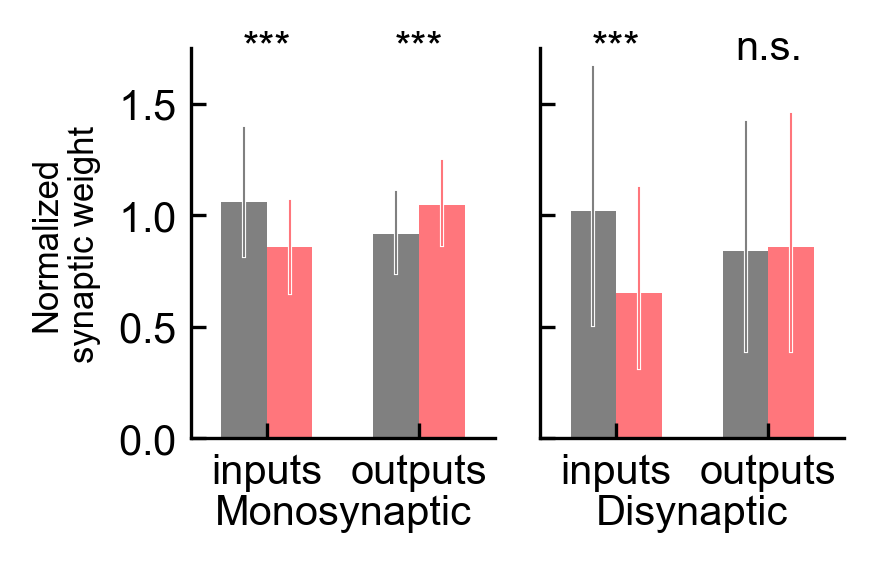

In [52]:
NAME= "NCR_motif_summary"

df_c = df_new[(df_new["EE_stdp"] == True) & (df_new["IE_stdp"] == True)]

# Calculating
# CR first NCR second
data = {"in_1":  [[], []], 
        "in_2":  [[], []],
        "out_1":  [[], []], 
        "out_2":  [[], []]}
in_types = {'ch', 'di'}
out_types = {'chR', 'co'}

for name in sig_names:
    current_type = find_type(name).split("_")[1]
    if (find_order(name) == 1) & (current_type in in_types):
        key = "in_1"
    elif (find_order(name) == 1) & (current_type in out_types):
        key = "out_1"
    elif (find_order(name) == 2) & (current_type in in_types):
        key = "in_2"
    elif (find_order(name) == 2) & (current_type in out_types):
        key = "out_2"
    else:
        continue
    
    mean = np.abs(df_c[name]).mean()
    data[key][0].extend(np.abs(df_c[df_c["NNR"] == False][name]) / mean)
    data[key][1].extend(np.abs(df_c[df_c["NNR"] == True][name]) / mean)

# Plotting 
fig, axs = plt.subplots(ncols=2, figsize=(3,2), sharey=True)
width = .3

for i, key in enumerate(["in_1", "out_1", "in_2", "out_2"]):
    for j, (d, color) in enumerate(zip(data[key], [R_COLOR, NNR_COLOR])):
        Q1, M, Q3 = np.percentile(d, 25), np.median(d), np.percentile(d, 75)
        l = int(i / 2)
        m = i % 2
        loc = m - 0.5*width + j*width
        axs[l].bar(loc, M, width=width, color=color)
        axs[l].plot([loc,loc], [Q1, Q3], lw=1, color='white')
        axs[l].plot([loc,loc], [Q1, Q3], lw=.5, color=color)

axs[0].text(0, 1.7, "***", ha="center")
axs[0].text(1, 1.7, "***", ha="center")
axs[1].text(0, 1.7, "***", ha="center")
axs[1].text(1, 1.7, "n.s.", ha="center")
for ax in axs:
    ax.set_xlim(-.5, 1.5)
    ax.set_xticks(range(2))
    ax.set_xticklabels(["inputs", "outputs"])
axs[0].text(.5, -.25, "Monosynaptic", ha="center", va="top")
axs[1].text(.5, -.25, "Disynaptic", ha="center", va="top")
axs[0].set_ylabel("Normalized\nsynaptic weight")
fig.tight_layout()
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True)
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

In [54]:
for key, d in data.items():
    diff = np.median(d[1]) - np.median(d[0])
    print(f"{key}: Delta median = {diff:.2f}, p = {sps.mannwhitneyu(d[0], d[1]).pvalue:.2}")

in_1: Delta median = -0.20, p = 0.0
in_2: Delta median = -0.36, p = 1.2e-223
out_1: Delta median = 0.13, p = 5.1e-99
out_2: Delta median = 0.02, p = 0.1


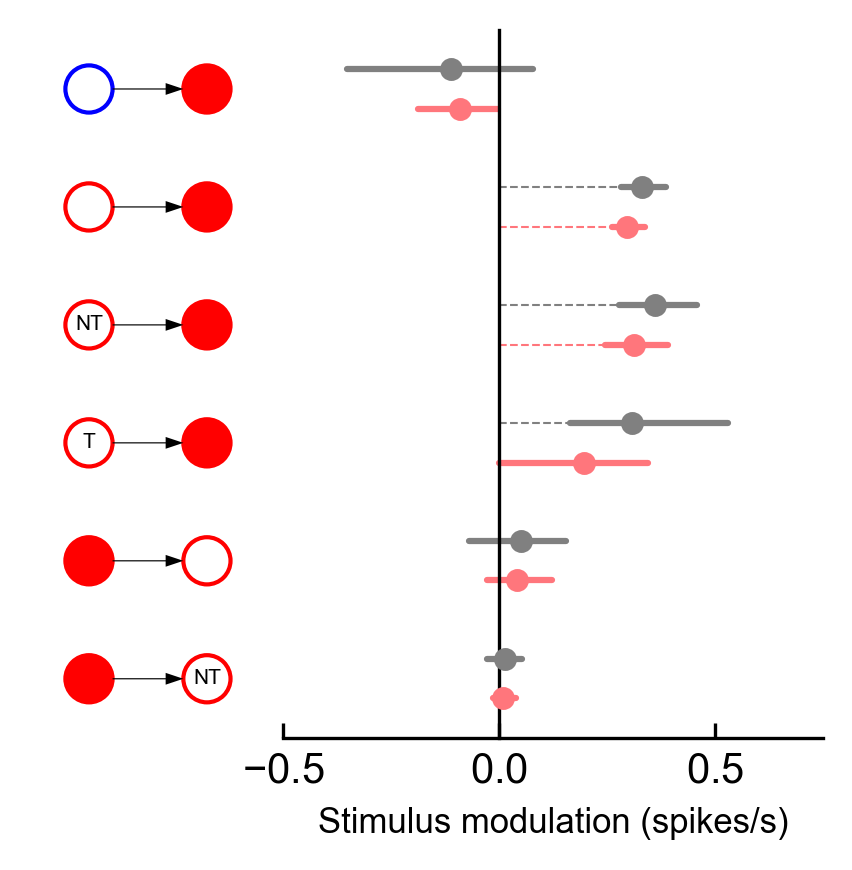

In [117]:
NAME= "sum_eta_NCR_first_order_stimulus_motif_contributions"
XLABEL = "Stimulus modulation (spikes/s)"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="s_con_", current_order=1, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[-0.5, 0.75], width_ratio=2, plot_style="scatter")

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300)

In [118]:
a = 0.05
n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inF_chR_1:	2.1329727274333803
out_chR_1:	1.032230542696539
inT_ch_1:	1.8290404490726322e-61
inF_ch_1:	2.0617740675930325e-38
out_ch_1:	4.368862616147175e-61
I_ch_1:	0.08923146055299443


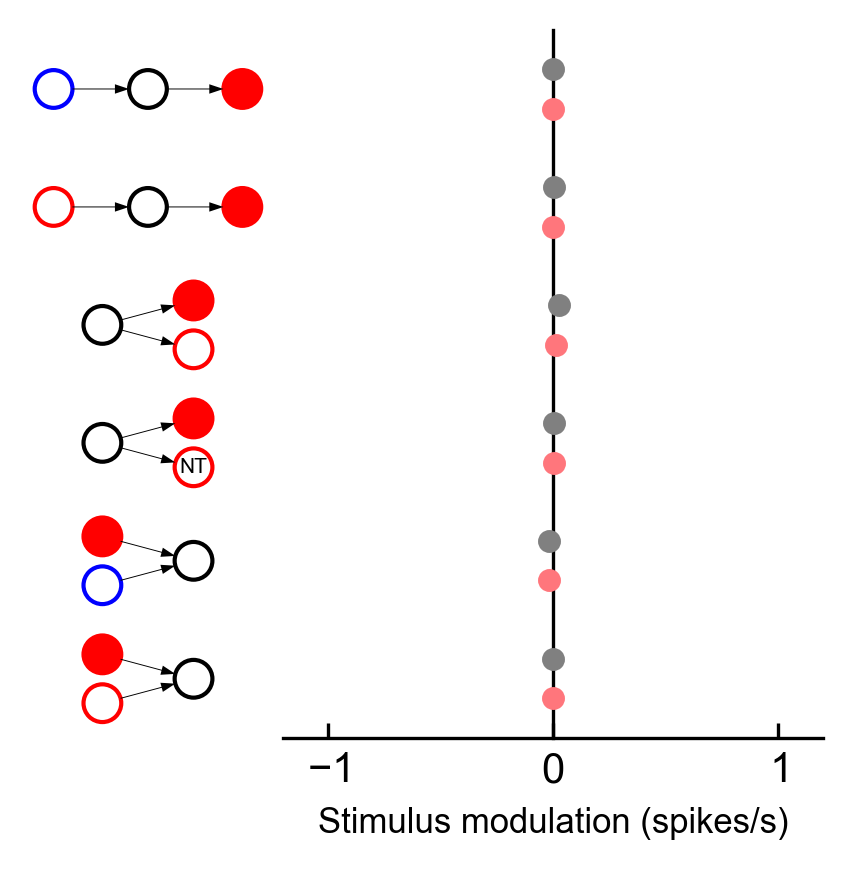

In [119]:
NAME= "sum_eta_NCR_second_order_stimulus_motif_contributions"
XLABEL = "Stimulus modulation (spikes/s)"

fig, (ax_m, ax_b), _ = plot_motif_contributions(df_new, prefix="s_con_", current_order=2, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], colors=[NNR_COLOR, R_COLOR], xlim=[-1.2, 1.2], sc=8, fs=5, width_ratio=2, plot_style="scatter")

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300)

In [120]:
a = 0.05
n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inF_chR_1:	2.1329727274333803
out_chR_1:	1.032230542696539
inT_ch_1:	1.8290404490726322e-61
inF_ch_1:	2.0617740675930325e-38
out_ch_1:	4.368862616147175e-61
I_ch_1:	0.08923146055299443


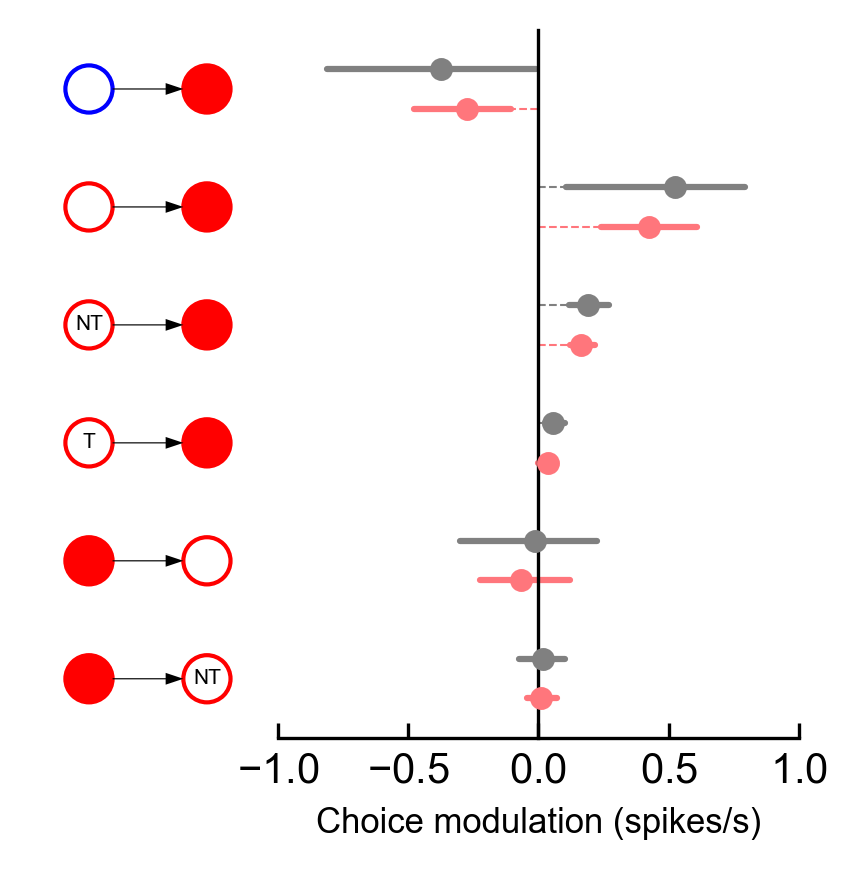

In [121]:
NAME= "sum_eta_NCR_first_order_choice_motif_contributions"
XLABEL = "Choice modulation (spikes/s)"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="c_con_", current_order=1, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[-1, 1], width_ratio=2, plot_style="scatter")

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300)

In [122]:
a = 0.05
n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inF_chR_1:	1.7466930085961316
out_chR_1:	0.06077973742920346
inT_ch_1:	1.4145982379124579e-55
inF_ch_1:	9.336783386056178e-15
out_ch_1:	4.863367161499057e-05
I_ch_1:	1.2761727746014295e-08


out_co_11:	8.242391505200499e-06
I_co_11:	2.7176568182719567
inF_di_11:	7.012485590386374e-47
out_di_11:	6.426164725250062e-76
out_ch_2:	1.475337528096361e-35
I_ch_2:	1.4390874396465994e-28


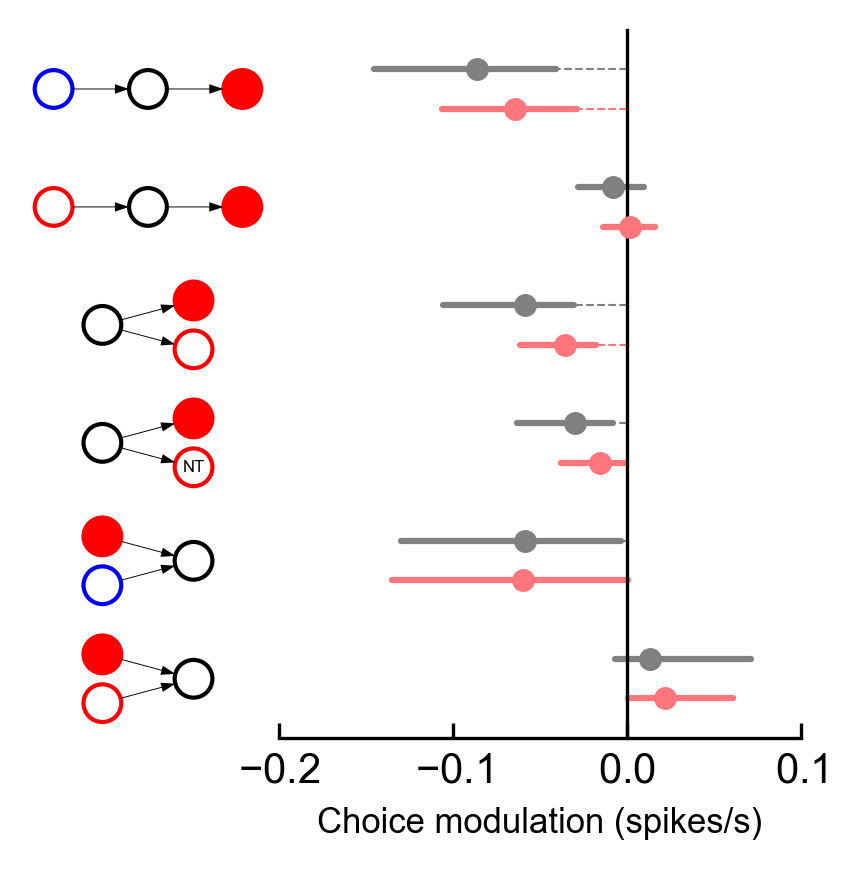

In [123]:
NAME= "sum_eta_NCR_second_order_choice_motif_contributions"
XLABEL = "Choice modulation (spikes/s)"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="c_con_", current_order=2, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[-0.2, 0.1], sc=8, fs=4, width_ratio=2, plot_style="scatter")

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300)

n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

inF_chR_1:	1.4173943958414253e-111
out_chR_1:	5.300197192544875e-146
inT_ch_1:	3.191618507724728e-53
inF_ch_1:	1.9349707048131974e-19
out_ch_1:	2.3150817767574667e-28
I_ch_1:	4.938877521889443e-108


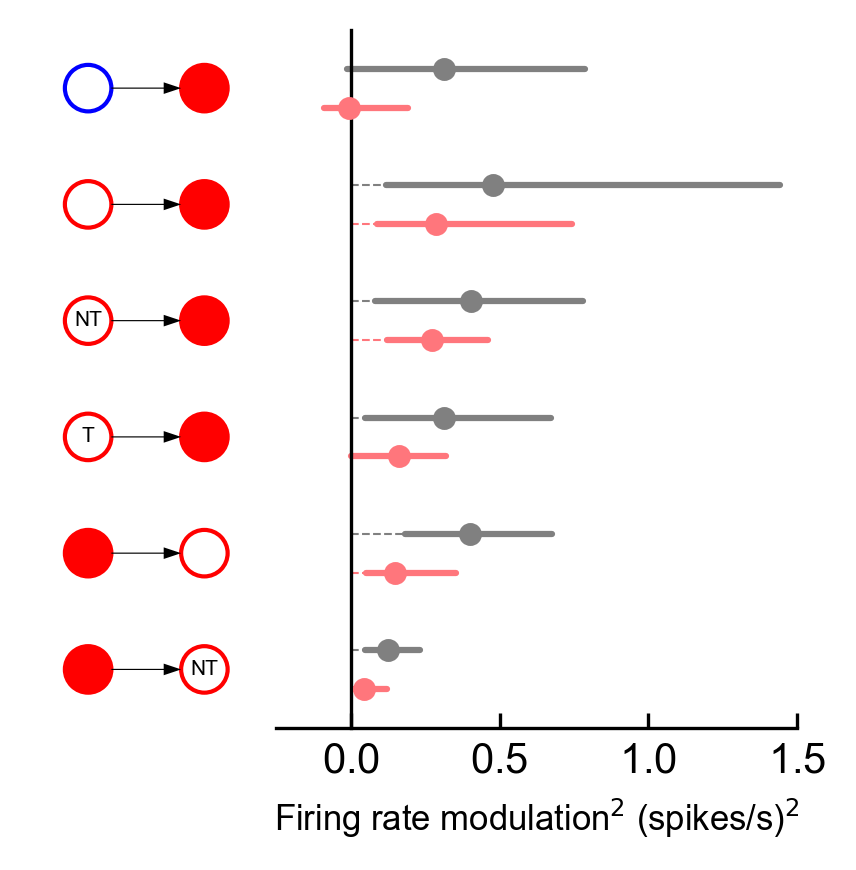

In [128]:
NAME= "sum_eta_NCR_first_order_response_motif_contributions"
XLABEL = "Firing rate modulation$^2$ (spikes/s)$^2$"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="r_con_", current_order=1, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[-0.25, 1.5], sortby="direction", show_net=False, width_ratio=2, plot_style="scatter")

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True)
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

out_co_11:	3.3066423388756835e-27
I_co_11:	1.764162835462785
inF_di_11:	2.937303932672534
out_di_11:	1.1854597100732558
out_ch_2:	6.231078113169875e-29
I_ch_2:	1.3295114358574778


out_co_11:	1.8412062817215642e-23
I_co_11:	4.0294821533744506e-33
inF_di_11:	1.187063439286476e-105
out_di_11:	5.700083162067759e-143
out_ch_2:	1.0438494975198987e-61
I_ch_2:	1.905074360764313e-124


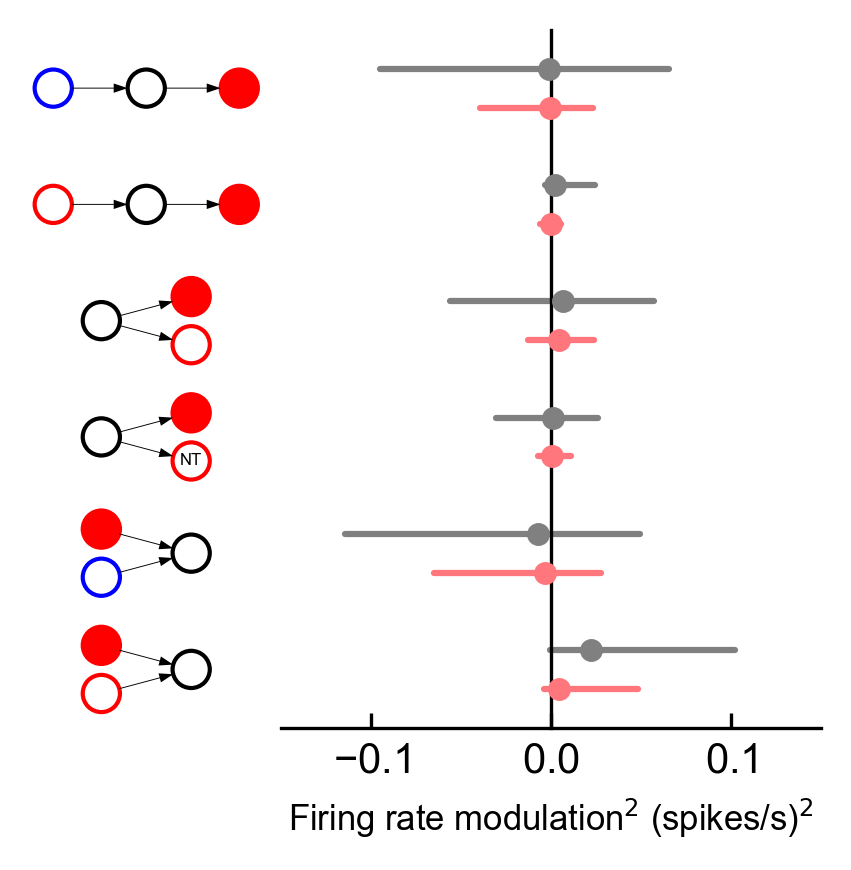

In [127]:
NAME= "sum_eta_NCR_second_order_response_motif_contributions"
XLABEL = "Firing rate modulation$^2$ (spikes/s)$^2$"

fig, (ax_m, ax_b), data = plot_motif_contributions(df_new, prefix="r_con_", current_order=2, keys=["NNR", "EE_stdp", "IE_stdp"], conds=[(True, True, True), (False, True, True)], labels=["NCR", "CR"], colors=[NNR_COLOR, R_COLOR], xlim=[-.15, .15], sc=8, fs=4, sortby="direction", width_ratio=2, plot_style="scatter")

ax_b.set_xlabel(XLABEL)
fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True )
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

n = len(data.keys())
test = sps.mannwhitneyu

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

print("\n")
test = sps.levene

for motif, pair in data.items():
    print(f'{motif}:\t{test(pair["NCR"], pair["CR"]).pvalue*n}')

0         4.041730
1         3.000954
2         2.461261
3         0.312445
4         0.714904
           ...    
14395     1.368042
14396     3.515498
14397     1.940468
14398     3.642641
14399    10.227444
Name: r_con_net_1, Length: 14400, dtype: float64

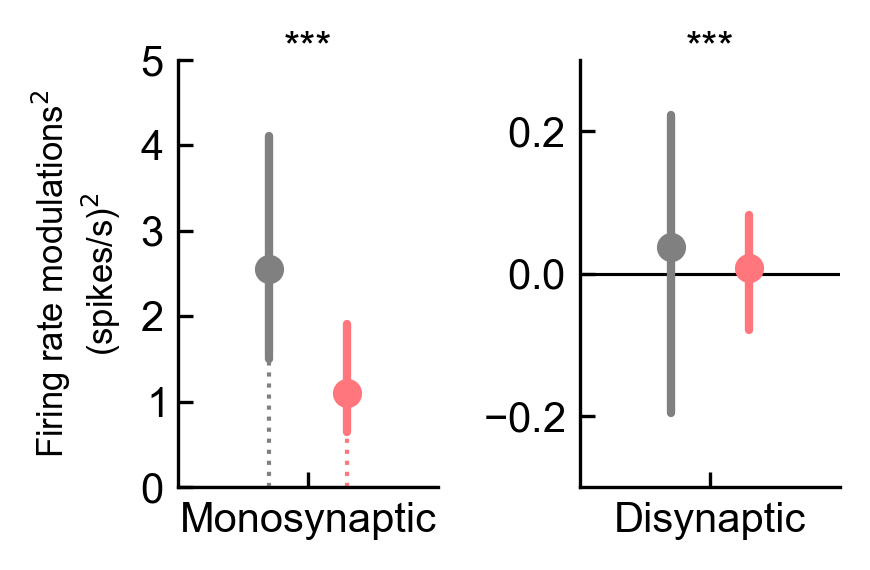

In [201]:
NAME= "NCR_motif_contribution_summary"

df_c = df_new[(df_new["EE_stdp"] == True) & (df_new["IE_stdp"] == True)]

# Calculating
# CR first NCR second
# data = {"in_1":  [[], []], 
#         "in_2":  [[], []],
#         "out_1":  [[], []], 
#         "out_2":  [[], []]}

data = {"mono": [df_c[df_c["NNR"] == False]["r_con_net_1"], df_c[df_c["NNR"] == True]["r_con_net_1"]],
        "di": [df_c[df_c["NNR"] == False]["r_con_net_2"], df_c[df_c["NNR"] == True]["r_con_net_2"]]} 
# in_types = {'ch', 'di'}
# out_types = {'chR', 'co'}

# for name in sig_names:
#     current_type = find_type(name).split("_")[1]
#     if (find_order(name) == 1) & (current_type in in_types):
#         key = "in_1"
#     elif (find_order(name) == 1) & (current_type in out_types):
#         key = "out_1"
#     elif (find_order(name) == 2) & (current_type in in_types):
#         key = "in_2"
#     elif (find_order(name) == 2) & (current_type in out_types):
#         key = "out_2"
#     else:
#         continue
    
#     data[key][0].extend(df_c[df_c["NNR"] == False]["r_con_" + name])
#     data[key][1].extend(df_c[df_c["NNR"] == True]["r_con_" + name])

# Plotting 
fig, axs = plt.subplots(ncols=2, figsize=(3,2), sharey=False)
width = .3

for i, key in enumerate(["mono", "di"]):
    axs[i].axhline(0, color='k', zorder=-1, lw=.75)
    for j, (d, color) in enumerate(zip(data[key], [R_COLOR, NNR_COLOR])):
        Q1, M, Q3 = np.percentile(d, 25), np.median(d), np.percentile(d, 75)
        l = int(i / 1)
        m = i % 1
        loc = m - 0.5*width + j*width
        axs[l].plot([loc,loc], [0, M], lw=1, color=color, linestyle=":")
        axs[l].scatter(loc, M,  color=color)
        #axs[l].plot([loc,loc], [Q1, Q3], lw=1, color='white')
        axs[l].plot([loc,loc], [Q1, Q3], lw=2, color=color, solid_capstyle='round')




axs[0].text(0, 5, "***", ha="center")
axs[1].text(0, .3, "***", ha="center")
for ax in axs:
    ax.set_xticks(range(1))
    ax.set_xlim(-.5, .5)
axs[0].set_ylim(0, 5)
axs[1].set_ylim(-.3, .3)
axs[0].set_xticklabels(["Monosynaptic"])
axs[1].set_xticklabels(["Disynaptic"])
axs[0].set_ylabel("Firing rate modulations$^2$\n(spikes/s)$^2$")

fig.savefig(os.path.join(DIR, f"{NAME}.pdf"), transparent=True)
fig.savefig(os.path.join(DIR, f"{NAME}.png"), dpi=300, transparent=True)

## Plotting distributions 

In [173]:
df = pd.read_csv(os.path.join(DIR, "calculate_responsiveness.csv"), index_col=0)

s = {}
c = {}
r = {}
labels = []
for EE_stdp, IE_stdp in product((False, True), (False, True)):
    if (IE_stdp, EE_stdp) == (False, False):
        label = "Pre-STDP"
    elif (IE_stdp, EE_stdp) == (True, False):
        label = "IE only"
        continue
    elif (IE_stdp, EE_stdp) == (False, True):
        label = "EE only"
        continue
    elif (IE_stdp, EE_stdp) == (True, True):
        label = "Post-STDP"
    s[label] = []
    c[label] = []
    r[label] = []
    
    c_df = df[(df["IE_stdp"] == IE_stdp) & (df["EE_stdp"] == EE_stdp)]
    for row in c_df.iterrows():
        for j in range(201, 801):
            try:
                resp = eval(row[1][j])
                s[label].append(resp["s_mean"])
                c[label].append(resp["c_mean"])
                r[label].append(resp["responsiveness"])
            except:
                continue

# Predictions
for EE_stdp, IE_stdp in product((False, True), (False, True)):
    if (IE_stdp, EE_stdp) == (False, False):
        label = "Pre-STDP Prediction"
    elif (IE_stdp, EE_stdp) == (True, False):
        label = "IE only Pred."
        continue
    elif (IE_stdp, EE_stdp) == (False, True):
        label = "EE only Prediction"
        continue
    elif (IE_stdp, EE_stdp) == (True, True):
        label = "Post-STDP Prediction"
    s[label] = []
    c[label] = []
    r[label] = []
    
    s_c = df_new[(df_new["IE_stdp"] == IE_stdp) & (df_new["EE_stdp"] == EE_stdp)]["cv_s_pred"].values
    c_c = df_new[(df_new["IE_stdp"] == IE_stdp) & (df_new["EE_stdp"] == EE_stdp)]["cv_c_pred"].values
    r_c = df_new[(df_new["IE_stdp"] == IE_stdp) & (df_new["EE_stdp"] == EE_stdp)]["cv_r_pred"].values

    s[label].extend(list(s_c))
    c[label].extend(list(c_c))
    r[label].extend(list(r_c))


In [174]:
PLOT_ORDER = ["Pre-STDP", "Pre-STDP Prediction", "Post-STDP", "Post-STDP Prediction"]
COLORS = [mpl.cm.Purples(i/5.) for i in [2,2, 5,5]]
STYLES = 2*['-', ':']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

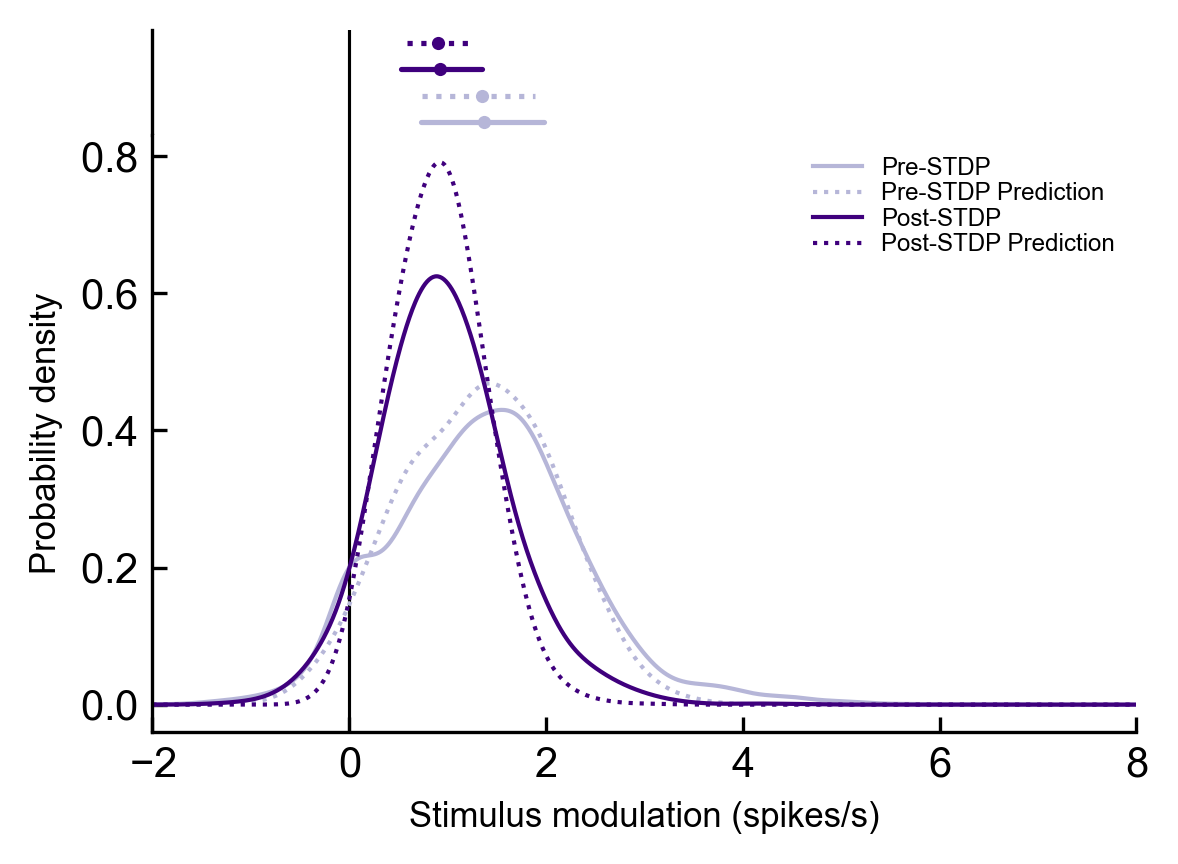

In [175]:
NAME = "_stimulus_responsiveness_pred"
XLABEL = "Stimulus modulation (spikes/s)"


fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(4,3))
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (ords, col, ls) in enumerate(zip(PLOT_ORDER, COLORS, STYLES)):
    plot_pdf_and_summary(s[ords], i, ax_d, ax_s, color=col, linestyle=ls, lim=(-2, 8), label=ords)
l = ax_d.legend(loc='best', fontsize='xx-small')
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)
ax_d.set_yticks([0, .2, .4, .6, .8])

fig.savefig(os.path.join(DIR, f"{NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}_300.png"), dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

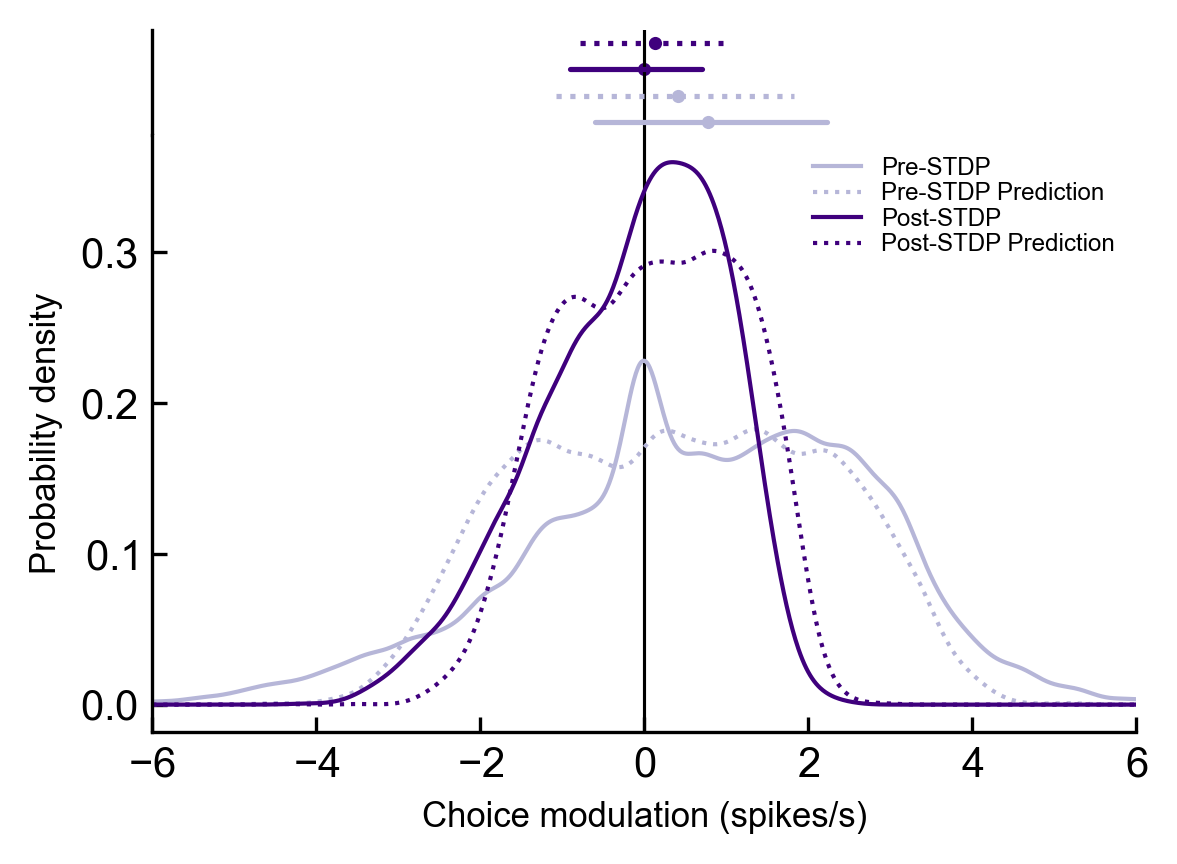

In [176]:
NAME = "_choice_responsiveness_pred"
XLABEL = "Choice modulation (spikes/s)"


fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(4, 3))
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (ords, col, ls) in enumerate(zip(PLOT_ORDER, COLORS, STYLES)):
    plot_pdf_and_summary(c[ords], i, ax_d, ax_s, color=col, linestyle=ls, lim=(-6, 6), label=ords)
l = ax_d.legend(loc='best', fontsize='xx-small')
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)

fig.savefig(os.path.join(DIR, f"{NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}_300.png"), dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

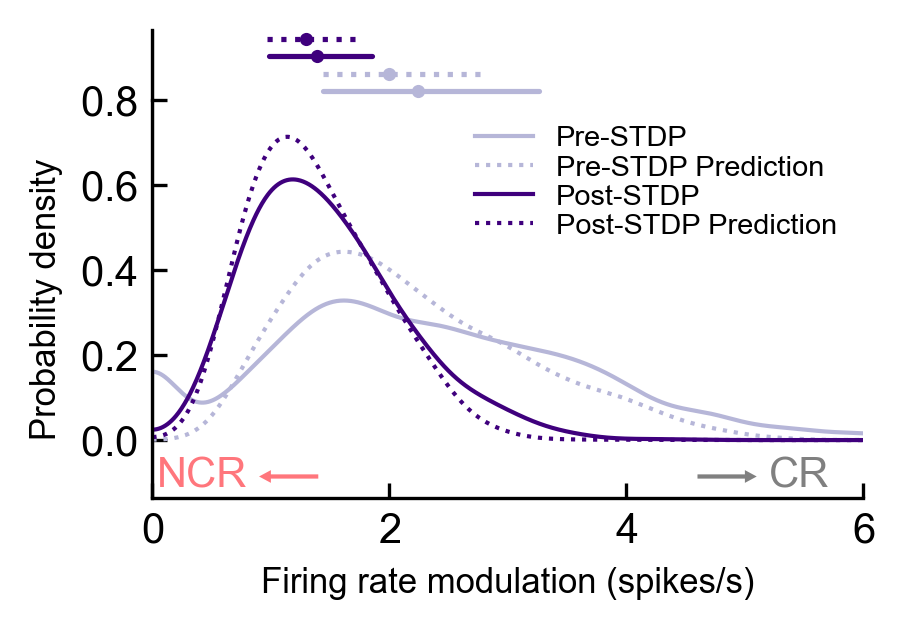

In [184]:
NAME = "_responsiveness_pred"
XLABEL = "Firing rate modulation (spikes/s)"

fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(3,2), left=.15)
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (ords, col, ls) in enumerate(zip(PLOT_ORDER, COLORS, STYLES)):
    plot_pdf_and_summary(r[ords], i, ax_d, ax_s, color=col, linestyle=ls, end_domain=0, lim=(0, 6), label=ords)
l = ax_d.legend(loc='best', fontsize='x-small')
ax_d.set_xlabel(XLABEL)
ax_d.set_yticks([0, 0.2, 0.4, 0.6, 0.8])

add_NCR_CR_scale(ax_d, hoffset=.8)

fig.savefig(os.path.join(DIR, f"{NAME}.pdf"))
fig.savefig(os.path.join(DIR, f"{NAME}_300.png"), dpi=300)